In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.utils import to_categorical

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [4]:
train = pd.read_csv('sign_mnist_train.csv')

In [5]:
test = pd.read_csv('sign_mnist_test.csv')

In [6]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [7]:
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [8]:
train_data = np.array(train, dtype="float32")
train_data

array([[  3., 107., 118., ..., 204., 203., 202.],
       [  6., 155., 157., ..., 103., 135., 149.],
       [  2., 187., 188., ..., 195., 194., 195.],
       ...,
       [ 18., 174., 174., ..., 202., 200., 200.],
       [ 17., 177., 181., ...,  64.,  87.,  93.],
       [ 23., 179., 180., ..., 205., 209., 215.]], dtype=float32)

In [9]:
test_data = np.array(test, dtype="float32")
test_data

array([[  6., 149., 149., ..., 112., 120., 107.],
       [  5., 126., 128., ..., 184., 182., 180.],
       [ 10.,  85.,  88., ..., 225., 224., 222.],
       ...,
       [  2., 190., 191., ..., 211., 209., 208.],
       [  4., 201., 205., ...,  67.,  70.,  63.],
       [  2., 173., 174., ..., 195., 193., 192.]], dtype=float32)

In [10]:
#Define class labels for easy interpretation
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Label for the image is:  E


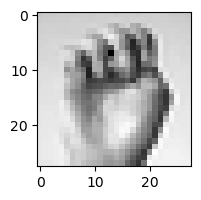

In [11]:
#Sanity check - plot a few images and labels
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap='gray') 
print("Label for the image is: ", class_names[int(train_data[i,0])])

Text(0.5, 1.0, 'Label')

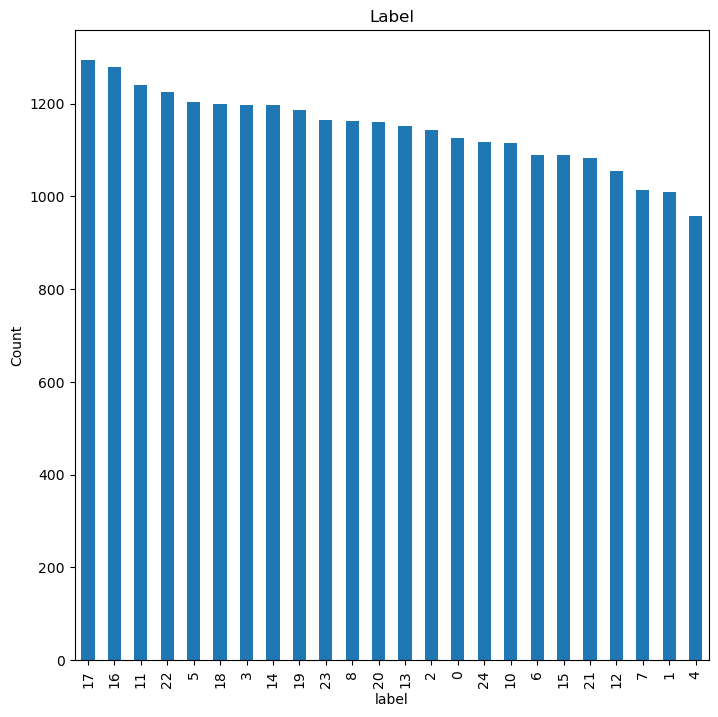

In [12]:
# Data distribution visualization
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [13]:
#Normalize / scale X values
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

#Convert y to categorical if planning on using categorical cross entropy
#No need to do this if using sparse categorical cross entropy
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

#Reshape for the neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [14]:
#Model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))


#If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# If your targets are integers, use sparse_categorical_crossentropy. 

#model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [15]:
# history = model.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))

Epoch 1/10
215/215 [==============================] - 63s 269ms/step - loss: 2.4020 - acc: 0.2640 - val_loss: 1.2853 - val_acc: 0.5782
Epoch 2/10
215/215 [==============================] - 53s 246ms/step - loss: 0.9878 - acc: 0.6667 - val_loss: 0.6894 - val_acc: 0.7724
Epoch 3/10
215/215 [==============================] - 52s 242ms/step - loss: 0.5758 - acc: 0.8054 - val_loss: 0.4877 - val_acc: 0.8279
Epoch 4/10
215/215 [==============================] - 50s 234ms/step - loss: 0.3726 - acc: 0.8774 - val_loss: 0.3915 - val_acc: 0.8790
Epoch 5/10
215/215 [==============================] - 50s 233ms/step - loss: 0.2716 - acc: 0.9110 - val_loss: 0.2976 - val_acc: 0.9013
Epoch 6/10
215/215 [==============================] - 53s 248ms/step - loss: 0.1968 - acc: 0.9340 - val_loss: 0.2756 - val_acc: 0.9041
Epoch 7/10
215/215 [==============================] - 59s 274ms/step - loss: 0.1483 - acc: 0.9513 - val_loss: 0.2323 - val_acc: 0.9211
Epoch 8/10
215/215 [==============================] - 5

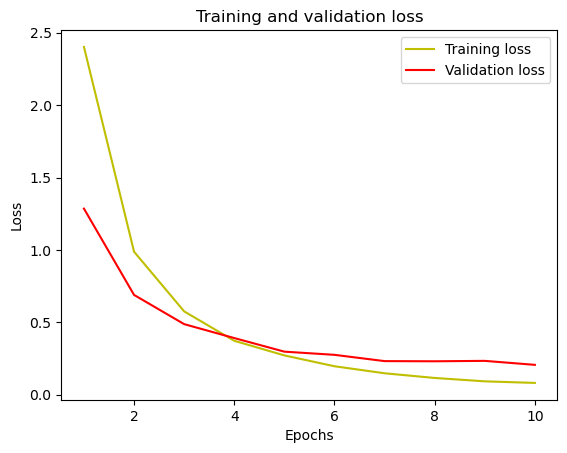

In [16]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

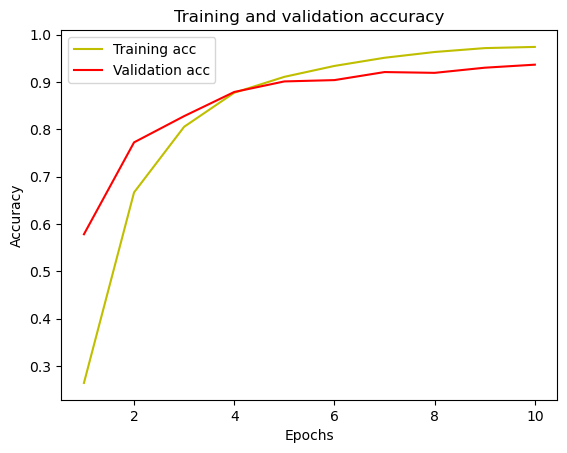

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
prediction = model.predict(X_test)

225/225 [==============================] - 8s 31ms/step


Accuracy Score =  0.9366982710540993
Predicted Label:  Y
True Label:  Y


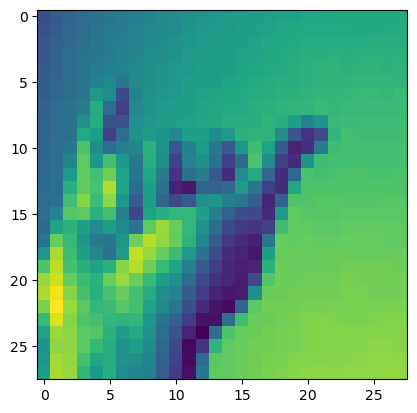

In [22]:
# Convert the predicted labels to one-hot encoded categorical labels
predicted_labels_cat = to_categorical(np.argmax(prediction, axis=1), num_classes=25)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_cat, predicted_labels_cat)
print('Accuracy Score = ', accuracy)
i = random.randint(1,len(predicted_labels_cat))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(predicted_labels_cat[i].argmax())])
print("True Label: ", class_names[int(y_test[i])])

<AxesSubplot:>

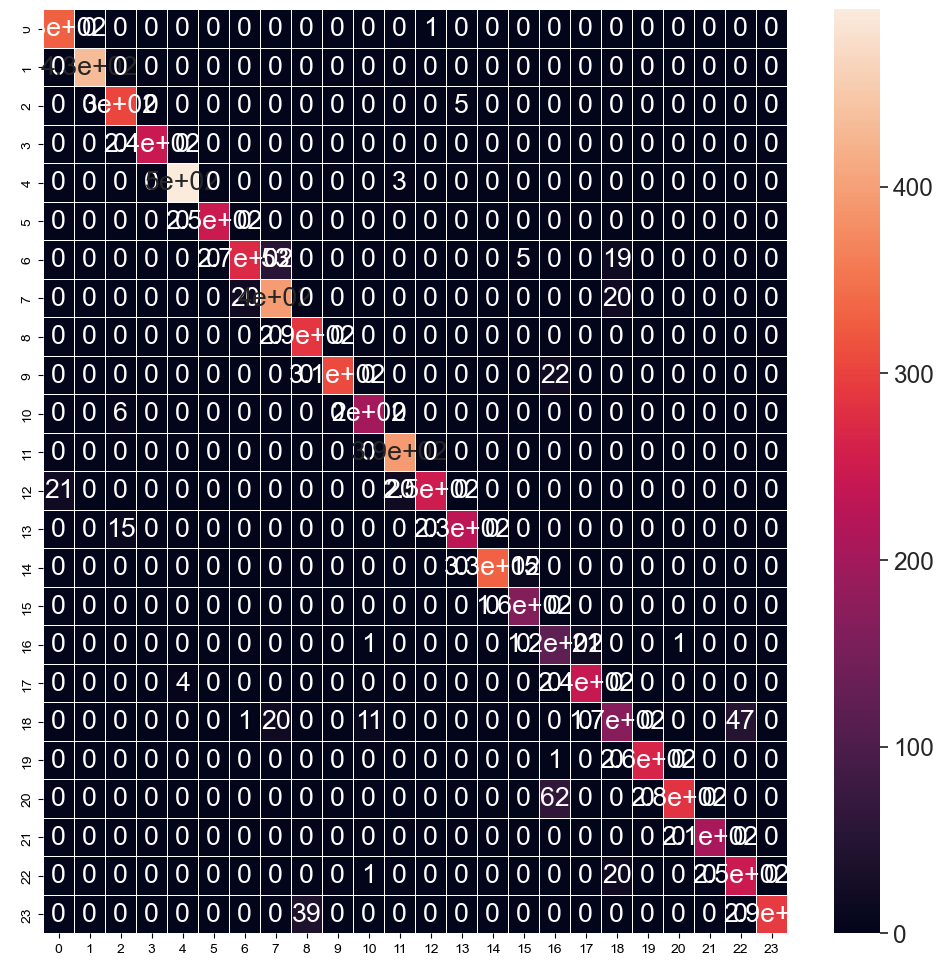

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert one-hot encoded categorical labels back to multiclass format
y_test_multiclass = np.argmax(y_test_cat, axis=1)
predicted_labels_multiclass = np.argmax(predicted_labels_cat, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_multiclass, predicted_labels_multiclass)

# Create a heatmap of the confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

incorr_fraction shape: (24,)
class_names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


ValueError: The number of FixedLocator locations (24), usually from a call to set_ticks, does not match the number of ticklabels (25).

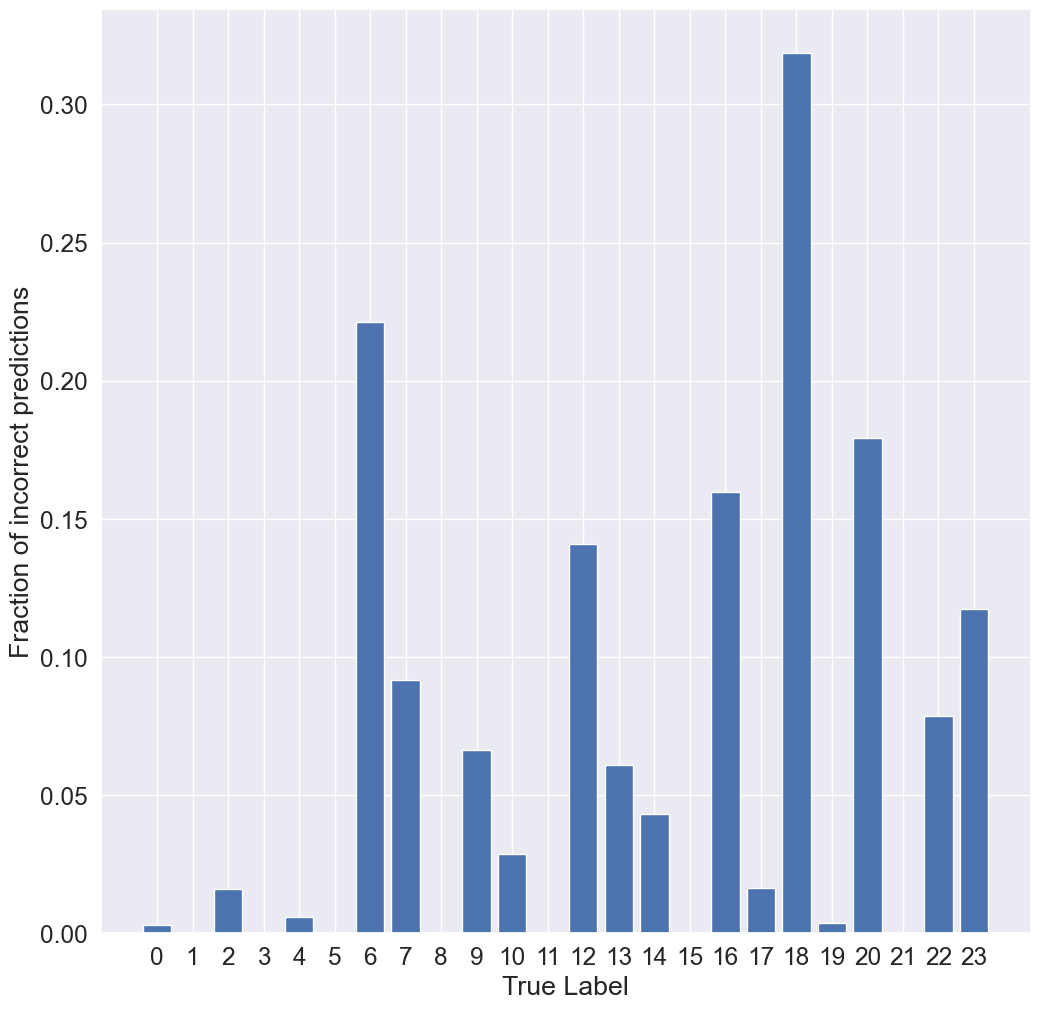

In [37]:
# PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

print("incorr_fraction shape:", incorr_fraction.shape)
print("class_names:", class_names)

fig, ax = plt.subplots(figsize=(12, 12))
plt.bar(np.arange(len(class_names)-1), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(len(class_names)-1), class_names)